In [2]:
import pandas as pd
#nRowsRead = 1000
#df1 = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', delimiter=',', nrows = nRowsRead)
df1 = pd.read_csv('training.1600000.processed.noemoticon.csv', delimiter=',', encoding='ISO-8859-1')

In [3]:
# Get the first 100 rows
first_100 = df1.head(100)

# Get the last 100 rows
last_100 = df1.tail(100)

# Concatenate both DataFrames
df_first_last_200 = pd.concat([first_100, last_100], ignore_index=True)

# Display the concatenated DataFrame
print(df_first_last_200)

     0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_  \
0    0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1    0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2    0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3    0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4    0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
..  ..         ...                           ...       ...              ...   
195  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
196  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
197  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
198  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
199  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

    @switchfoot http://twitpic.com/2y1zl - Awww, th

In [4]:
df_first_last_200.columns = ["sentiment", "id", "date", "query", "user", "text"]
df_first_last_200.replace({'sentiment': {4:1}}, inplace=True)

In [5]:
df_first_last_200

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
195,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
196,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
197,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
198,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [7]:
df1

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
df1.columns = ["sentiment", "id", "date", "query", "user", "text"]

In [9]:
df1

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
df1["sentiment"].value_counts()
#0 --> negative
#4 --> positive

sentiment
4    800000
0    799999
Name: count, dtype: int64

In [11]:
df1.replace({'sentiment': {4:1}}, inplace=True)

In [12]:
df1["text"][100]

'@mangaaa I hope they will increase the capacity fast, yesterday was such a pain. Got the fail whale +15 times in 2 hours.... '

In [13]:
df1

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [73]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '',text) #remove @mentiom
    text=re.sub(r'#', '', text) #remove the # symbol
    text=re.sub(r'http\S+|www\.\S+', '', text) #remove urls
    text=re.sub(r'\s+', ' ', text).strip() #remove exceesive whitespace
    text=re.sub(r'[^A-Za-z0-9\s]', '', text) #character + number

    return text
df1["cleaned_text"] = df1["text"].apply(cleanTxt)
#show cleaned text
df_first_last_200["cleaned_text"] = df_first_last_200["text"].apply(cleanTxt)


In [15]:
print(df1["cleaned_text"])

0          is upset that he cant update his Facebook by t...
1          I dived many times for the ball Managed to sav...
2             my whole body feels itchy and like its on fire
3          no its not behaving at all im mad why am i her...
4                                         not the whole crew
                                 ...                        
1599994    Just woke up Having no school is the best feel...
1599995    TheWDBcom  Very cool to hear old Walt interviews 
1599996    Are you ready for your MoJo Makeover Ask me fo...
1599997    Happy 38th Birthday to my boo of alll time Tup...
1599998                                 happy charitytuesday
Name: cleaned_text, Length: 1599999, dtype: object


In [16]:
df2 = pd.DataFrame()
df2["cleaned_text"] = df1["text"].apply(cleanTxt)


In [17]:
df3 = pd.DataFrame()
df3["sentiment_cri"]=df1["sentiment"]


In [18]:
df_t_2 = pd.DataFrame()

df_t_2["cleaned_text"] = df_first_last_200["text"].apply(cleanTxt)
df_t_3 = pd.DataFrame()
df_t_3["sentiment"] = df_first_last_200["sentiment"]




In [19]:
df2

,cleaned_text
0,is upset that he cant update his Facebook by t...
1,I dived many times for the ball Managed to sav...
2,my whole body feels itchy and like its on fire
3,no its not behaving at all im mad why am i her...
4,not the whole crew
...,...
1599994,Just woke up Having no school is the best feel...
1599995,TheWDBcom Very cool to hear old Walt interviews
1599996,Are you ready for your MoJo Makeover Ask me fo...
1599997,Happy 38th Birthday to my boo of alll time Tup...


In [20]:
df3

,sentiment_cri
0,0
1,0
2,0
3,0
4,0
...,...
1599994,1
1599995,1
1599996,1
1599997,1


In [21]:
# Assuming your DataFrame is named `df` and has columns 'text' and 'label'
X = df2["cleaned_text"]    # Features
y = df3["sentiment_cri"]   # Target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13984878 stored elements and shape (1279999, 100000)>

In [24]:
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3480914 stored elements and shape (320000, 100000)>

In [25]:
y_test

541200     0
750        0
766711     0
285055     0
705995     0
          ..
839535     1
1023175    1
1349376    1
1086941    1
158976     0
Name: sentiment_cri, Length: 320000, dtype: int64

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.798865625
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [28]:
df1

,sentiment,id,date,query,user,text,cleaned_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...


In [29]:
def get_month(date):
    month = date.split()[1]
    return month

df1['month'] = df1['date'].apply(get_month)
df1



,sentiment,id,date,query,user,text,cleaned_text,month
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,Apr
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,Apr
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Apr
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,Apr
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,Apr
...,...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...,Jun
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews,Jun
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,Jun
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...,Jun


In [30]:
new_sentences = [
    "love you",
    "god bless you",
    "miss you!"
]

In [31]:
df1['date'][1]

'Mon Apr 06 22:19:53 PDT 2009'

In [32]:
new_sentences_tfidf = tfidf_vectorizer.transform(new_sentences)

In [33]:
new_predictions = model.predict(new_sentences_tfidf)

In [34]:
for sentence, prediction in zip(new_sentences, new_predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted label: {prediction}")
    print("------")

Sentence: love you
Predicted label: 1
------
Sentence: god bless you
Predicted label: 1
------
Sentence: miss you!
Predicted label: 0
------


In [54]:
dft = pd.read_csv('sentiment-test.csv', delimiter=',', encoding='ISO-8859-1')


In [55]:
dft

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#eidt testing file(changed sentiment tag form negavtive positive to 1 and 0)
dft.replace({'sentiment': {'positive' : int(1)}}, inplace=True)
dft.replace({'sentiment': {'negative' : int(0)}}, inplace=True)
dft = dft.drop(dft[dft['sentiment'] == 'neutral'].index)
dft.dropna(subset=['textID'], inplace=True)

#cleans dft text and adds new columm
dft["cleaned_text"] = dft["text"].apply(cleanTxt)

dft


/tmp/ipykernel_10361/1929062852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dft.replace({'sentiment': {'positive' : int(1)}}, inplace=True)


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting precisely sk...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,night,31-45,Algeria,43851044.0,2381740.0,18.0,Recession hit Veronique Branquinho she has to ...
3,01082688c6,happy bday!,1,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1,noon,60-70,Angola,32866272.0,1246700.0,26.0,I like it
5,726e501993,that`s great!! weee!! visitors!,1,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0,thats great weee visitors
...,...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554.0,120340.0,55.0,its at 3 am im very tired but i cant sleep but...
3530,416863ce47,All alone in this old house again. Thanks for...,1,night,31-45,Niger,24206644.0,1266700.0,19.0,All alone in this old house again Thanks for t...
3531,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589.0,910770.0,226.0,I know what you mean My little dog is sinking ...
3532,df1baec676,_sutra what is your next youtube video gonna b...,1,noon,60-70,North Korea,25778816.0,120410.0,214.0,sutra what is your next youtube video gonna be...


In [64]:
x_axis = dft['cleaned_text']
X_test2_tfidf = tfidf_vectorizer.transform(x_axis)
y_axis = dft['sentiment']

In [65]:
y_axis

1       1
2       0
3       1
4       1
5       1
       ..
3529    0
3530    1
3531    0
3532    1
3533    1
Name: sentiment, Length: 2104, dtype: int64

In [66]:
print(X_test2_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 23341 stored elements and shape (2104, 100000)>
  Coords	Values
  (0, 5936)	0.18373885119184336
  (0, 13050)	0.3344349250522166
  (0, 17658)	0.27537680239321605
  (0, 28552)	0.23131570016458775
  (0, 34164)	0.32863642319803066
  (0, 36168)	0.11921963163817263
  (0, 42795)	0.09379232545353436
  (0, 43859)	0.0906282450522222
  (0, 66598)	0.3360758582613688
  (0, 71810)	0.13753536025297605
  (0, 77489)	0.3277692250206628
  (0, 77646)	0.3249154584967969
  (0, 79825)	0.42379826923230335
  (0, 89978)	0.24770472305217134
  (1, 19158)	0.3070538928390159
  (1, 38342)	0.19379626845417794
  (1, 39075)	0.2005105665302482
  (1, 39748)	0.2687852316354559
  (1, 68579)	0.33746155421909985
  (1, 72034)	0.38654964366963446
  (1, 77603)	0.29513971919097837
  (1, 77833)	0.21396790771266802
  (1, 84452)	0.24427518383493604
  (1, 88085)	0.08899674923419822
  (1, 92561)	0.5403049985018007
  :	:
  (2101, 56234)	0.24900039410564367
  (2101, 57253)	0

In [67]:
y_test2_pred

array([1, 0, 1, ..., 0, 1, 1])

In [68]:
y_axis

1       1
2       0
3       1
4       1
5       1
       ..
3529    0
3530    1
3531    0
3532    1
3533    1
Name: sentiment, Length: 2104, dtype: int64

In [69]:
y_test2_pred = model.predict(X_test2_tfidf)
accuracy = accuracy_score(y_axis, y_test2_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_axis, y_test2_pred))

Accuracy: 0.8702471482889734
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1001
           1       0.89      0.86      0.87      1103

    accuracy                           0.87      2104
   macro avg       0.87      0.87      0.87      2104
weighted avg       0.87      0.87      0.87      2104



In [70]:
words_dict = dict()
for t in df2['cleaned_text']:
    words = [e.lower() for e in t.split()]
    for w in words:
        if w in words_dict:
            words_dict[w] += 1
        else:
            words_dict[w] = 0

occurence_rate = sorted(words_dict.items(), key = lambda x: -x[1])
print(occurence_rate[:100])


[('i', 751043), ('to', 564554), ('the', 520032), ('a', 378247), ('my', 314071), ('and', 298407), ('you', 270129), ('is', 236036), ('it', 230910), ('for', 215701), ('in', 214236), ('of', 183432), ('im', 178364), ('on', 167092), ('me', 160209), ('so', 150783), ('have', 144512), ('that', 141348), ('but', 127474), ('just', 125058), ('with', 114877), ('be', 112544), ('at', 111318), ('its', 108552), ('not', 106376), ('was', 104081), ('this', 93006), ('now', 90386), ('good', 89409), ('up', 88480), ('day', 82400), ('get', 81489), ('all', 80697), ('out', 80533), ('like', 77749), ('are', 77697), ('no', 73638), ('go', 72926), ('dont', 67298), ('do', 65989), ('your', 65000), ('today', 64618), ('too', 64213), ('going', 64089), ('love', 63579), ('cant', 62879), ('work', 62779), ('got', 60752), ('time', 56112), ('from', 55999), ('back', 55983), ('lol', 55189), ('u', 52879), ('one', 52307), ('what', 52220), ('will', 51838), ('know', 51204), ('we', 50916), ('about', 50206), ('really', 49554), ('am', 49

In [71]:
for i in range(100):
    print('most occuring word no.' + str(i + 1) + ': ' + str(occurence_rate[i]))

most occuring word no.1: ('i', 751043)
most occuring word no.2: ('to', 564554)
most occuring word no.3: ('the', 520032)
most occuring word no.4: ('a', 378247)
most occuring word no.5: ('my', 314071)
most occuring word no.6: ('and', 298407)
most occuring word no.7: ('you', 270129)
most occuring word no.8: ('is', 236036)
most occuring word no.9: ('it', 230910)
most occuring word no.10: ('for', 215701)
most occuring word no.11: ('in', 214236)
most occuring word no.12: ('of', 183432)
most occuring word no.13: ('im', 178364)
most occuring word no.14: ('on', 167092)
most occuring word no.15: ('me', 160209)
most occuring word no.16: ('so', 150783)
most occuring word no.17: ('have', 144512)
most occuring word no.18: ('that', 141348)
most occuring word no.19: ('but', 127474)
most occuring word no.20: ('just', 125058)
most occuring word no.21: ('with', 114877)
most occuring word no.22: ('be', 112544)
most occuring word no.23: ('at', 111318)
most occuring word no.24: ('its', 108552)
most occuring

In [72]:
df1

,sentiment,id,date,query,user,text,cleaned_text,month
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,Apr
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,Apr
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Apr
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,Apr
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,Apr
...,...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...,Jun
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews,Jun
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,Jun
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...,Jun


In [ ]:
def get_time(date):
    time = date.split()[3]
    hour = time.split(':')[0]
    return hour

df1['time'] = df1['date'].apply(get_time)


In [ ]:
df1

,sentiment,id,date,query,user,text,cleaned_text,month,time
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,Apr,22
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,Apr,22
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Apr,22
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,Apr,22
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,Apr,22
...,...,...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...,Jun,08
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews,Jun,08
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,Jun,08
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...,Jun,08


In [ ]:
time_dict = dict()
for t in df1['time']:
    if t in time_dict:
        time_dict[t] += 1
    else:
        time_dict[t] = 0

time_occurence_rate = dict(sorted(time_dict.items(), key = lambda x: x[0]))
print(time_occurence_rate)


        

{'00': 80864, '01': 75267, '02': 73990, '03': 74252, '04': 76994, '05': 78622, '06': 80851, '07': 83653, '08': 76286, '09': 67277, '10': 60688, '11': 61008, '12': 51652, '13': 49688, '14': 50379, '15': 50642, '16': 55719, '17': 51842, '18': 53484, '19': 57721, '20': 57058, '21': 68963, '22': 78326, '23': 84749}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
time = list(time_occurence_rate.keys())
rate = list(time_occurence_rate.values())

print(time, rate)

x_points = np.array(time)
y_points = np.array(rate)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'] [80864, 75267, 73990, 74252, 76994, 78622, 80851, 83653, 76286, 67277, 60688, 61008, 51652, 49688, 50379, 50642, 55719, 51842, 53484, 57721, 57058, 68963, 78326, 84749]


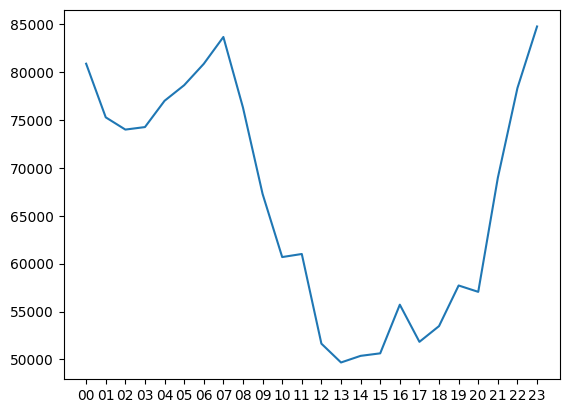

In [ ]:
plt.plot(x_points, y_points)
plt.show()

In [ ]:
time_occur_sentiment = dict()

for t in time_occurence_rate:
    time_occur_sentiment[t] = [0, 0]

print(time_occur_sentiment)
#let negative(sentiment = 0) counted at index = 0 and positive(sentiment = 1) count at index 1 in dict
i = 0
for index, row in df1.iterrows():
    t = row['time']
    if row['sentiment'] == 0:
        time_occur_sentiment[t][0] += 1
    elif row['sentiment'] == 1:
        time_occur_sentiment[t][1] += 1

    i += 1
        

{'00': [0, 0], '01': [0, 0], '02': [0, 0], '03': [0, 0], '04': [0, 0], '05': [0, 0], '06': [0, 0], '07': [0, 0], '08': [0, 0], '09': [0, 0], '10': [0, 0], '11': [0, 0], '12': [0, 0], '13': [0, 0], '14': [0, 0], '15': [0, 0], '16': [0, 0], '17': [0, 0], '18': [0, 0], '19': [0, 0], '20': [0, 0], '21': [0, 0], '22': [0, 0], '23': [0, 0]}


In [ ]:
time_occur_sentiment

{'00': [35582, 45283],
 '01': [30581, 44687],
 '02': [30171, 43820],
 '03': [31717, 42536],
 '04': [34946, 42049],
 '05': [37774, 40849],
 '06': [40076, 40776],
 '07': [42208, 41446],
 '08': [40166, 36121],
 '09': [36511, 30767],
 '10': [31597, 29092],
 '11': [31336, 29673],
 '12': [28120, 23533],
 '13': [27449, 22240],
 '14': [27077, 23303],
 '15': [28531, 22112],
 '16': [31594, 24126],
 '17': [29316, 22527],
 '18': [29422, 24063],
 '19': [31193, 26529],
 '20': [30102, 26957],
 '21': [36007, 32957],
 '22': [39017, 39310],
 '23': [39506, 45244]}

In [ ]:
#let index 2 be ratio of negative sentiment and index 3 be ratio of positive sentiment
time_occur_ratio = dict()
for t in time_occurence_rate:
    negative_n = time_occur_sentiment[t][0]
    positive_n = time_occur_sentiment[t][1]
    total_n = time_occurence_rate[t]

    print(negative_n, positive_n, total_n)

    negative_ratio = negative_n / total_n
    positive_ratio = positive_n / total_n

    time_occur_ratio[t] = {'neg' : negative_ratio, 'pos' : positive_ratio}

print(time_occur_ratio)

35582 45283 80864
30581 44687 75267
30171 43820 73990
31717 42536 74252
34946 42049 76994
37774 40849 78622
40076 40776 80851
42208 41446 83653
40166 36121 76286
36511 30767 67277
31597 29092 60688
31336 29673 61008
28120 23533 51652
27449 22240 49688
27077 23303 50379
28531 22112 50642
31594 24126 55719
29316 22527 51842
29422 24063 53484
31193 26529 57721
30102 26957 57058
36007 32957 68963
39017 39310 78326
39506 45244 84749
{'00': {'neg': 0.4400227542540562, 'pos': 0.5599896121883656}, '01': {'neg': 0.4063002378200274, 'pos': 0.5937130482150212}, '02': {'neg': 0.4077713204487093, 'pos': 0.5922421948912016}, '03': {'neg': 0.4271534773474115, 'pos': 0.5728599903032915}, '04': {'neg': 0.4538795230797205, 'pos': 0.5461334649453204}, '05': {'neg': 0.4804507644170843, 'pos': 0.5195619546691765}, '06': {'neg': 0.4956772334293948, 'pos': 0.5043351350014224}, '07': {'neg': 0.5045605058993701, 'pos': 0.49545144824453397}, '08': {'neg': 0.5265186272710589, 'pos': 0.47349448129407756}, '09': {

In [ ]:
neg_ratio_list = [time_occur_ratio[i]['neg'] for i in time_occur_ratio]
print(neg_ratio_list)

[0.4400227542540562, 0.4063002378200274, 0.4077713204487093, 0.4271534773474115, 0.4538795230797205, 0.4804507644170843, 0.4956772334293948, 0.5045605058993701, 0.5265186272710589, 0.5426966125124485, 0.5206465858159768, 0.513637555730396, 0.5444126074498568, 0.5524271453872163, 0.5374660076619227, 0.5633861221910667, 0.5670238159335236, 0.5654874426140967, 0.5501084436466981, 0.5404099028083367, 0.5275684391321112, 0.5221205574003451, 0.4981359957102367, 0.4661529929556691]


In [ ]:
pos_ratio_list = [time_occur_ratio[i]['pos'] for i in time_occur_ratio]
print(pos_ratio_list)

[0.5599896121883656, 0.5937130482150212, 0.5922421948912016, 0.5728599903032915, 0.5461334649453204, 0.5195619546691765, 0.5043351350014224, 0.49545144824453397, 0.47349448129407756, 0.45731825140835647, 0.4793698919061429, 0.4863788355625492, 0.4556067528846898, 0.4475929801964257, 0.4625538418785605, 0.4366336242644445, 0.432994131265816, 0.4345318467651711, 0.4499102535337671, 0.45960742190883735, 0.47244908689403764, 0.4778939431289242, 0.5018767714424329, 0.5338588065935881]


In [ ]:
time = list(time_occurence_rate.keys())
neg_rate = neg_ratio_list

print(time, rate)

x_points = np.array(time)
y_points = np.array(neg_rate)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'] [80864, 75267, 73990, 74252, 76994, 78622, 80851, 83653, 76286, 67277, 60688, 61008, 51652, 49688, 50379, 50642, 55719, 51842, 53484, 57721, 57058, 68963, 78326, 84749]


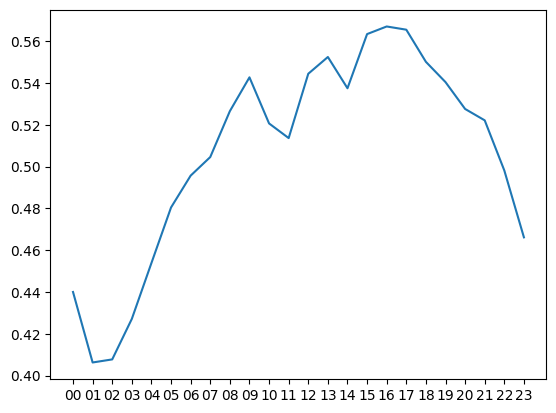

In [ ]:
plt.plot(x_points, y_points)
plt.show()

In [ ]:
time = list(time_occurence_rate.keys())
pos_rate = pos_ratio_list

x_points = np.array(time)
y_points = np.array(pos_rate)

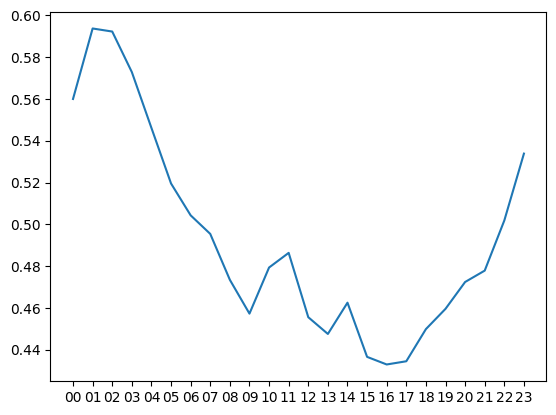

In [ ]:
plt.plot(x_points, y_points)
plt.show()

In [74]:
print('hello world')

hello world
